In [19]:
import keras
from keras.datasets import mnist
from keras import layers
import numpy as np
import matplotlib.pyplot as plt

In [22]:
def get_mnist_model():
    inputs = keras.Input(shape=(28 * 28,))
    features = layers.Dense(512, activation="relu")(inputs)
    features = layers.Dropout(0.5)(features)
    outputs = layers.Dense(10, activation="softmax")(features)
    model = keras.Model(inputs=inputs, outputs=outputs)
    return model

#### Load your data, reserving some for validation. The data must be preprocessed before training the network. If you inspect the first image in the training set, you will see that the pixel values fall in the range of 0 to 255:

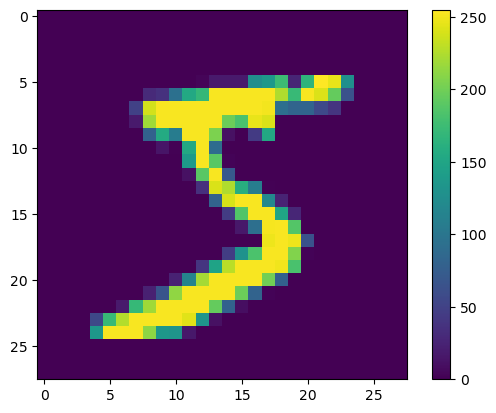

In [25]:
(images, labels), (test_images, test_labels) = mnist.load_data()

plt.figure()
plt.imshow(images[0])
plt.colorbar()
plt.grid(False)
plt.show()


In [26]:
images = images.reshape((60000, 28*28)).astype("float32") / 255
test_images = test_images.reshape((10000, 28*28)).astype("float32") / 255

train_images, val_images = images[10000:], images[:10000]
train_labels, val_labels = labels[10000:], labels[:10000]

#### Compile the model by specifying its optimizer, the loss function to minimize, and the metrics to monitor

In [27]:
model = get_mnist_model()

model.compile(optimizer="rmsprop",
             loss="sparse_categorical_crossentropy",
             metrics=["accuracy"])

#### Use fit() to train the model, optionally providing validation data to monitor performance on unseen data.

In [28]:
model.fit(
    train_images,
    train_labels,
    epochs=3,
    validation_data=(val_images, val_labels)
)

Epoch 1/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8617 - loss: 0.4542 - val_accuracy: 0.9592 - val_loss: 0.1402
Epoch 2/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9521 - loss: 0.1638 - val_accuracy: 0.9701 - val_loss: 0.1125
Epoch 3/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9639 - loss: 0.1295 - val_accuracy: 0.9711 - val_loss: 0.1090


#### Use evaluate() to compute the loss and metrics on new data.

In [29]:
test_metrics = model.evaluate(test_images, test_labels)
test_metrics

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9704 - loss: 0.1142


[0.09977845102548599, 0.9726999998092651]

#### Use predict() to computeclassification probabilities on new data.

In [30]:
predictions = model.predict(test_images)
predictions[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 844us/step


array([2.9181668e-10, 2.8587972e-12, 1.6164179e-08, 4.0210315e-07,
       4.2786534e-14, 1.2628255e-09, 9.3736171e-16, 9.9999964e-01,
       7.1408994e-12, 1.5673137e-08], dtype=float32)

#### Verify predictions

In [35]:
np.argmax(predictions[0])

np.int64(7)

In [36]:
test_labels[0]

np.uint8(7)